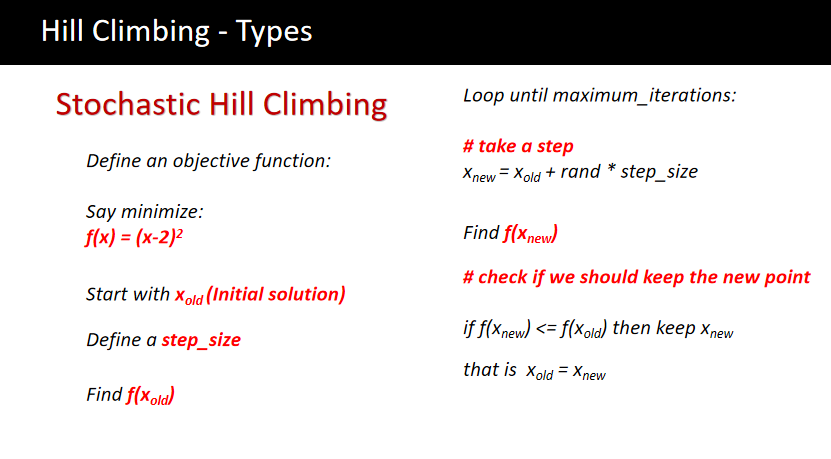

In [ ]:
# hill climbing search of a n-dimensional objective function (here n=2)
from numpy import asarray
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(X):
    '''
    #################################################################################
    MAXIMIZE f(x) = 2xy + 2x - x^2 - 2y^2
    OPTIMUM SOLUTION IS x* = 2 AND y* = 1
    #################################################################################
    '''
    x, y = X[0], X[1]
    f = 2*x*y + 2*x - x**2 - 2*(y**2)
    return f

def objective_2(X):

    '''
    #################################################################################
    BOOTH'S FUNCTION
    MINIMIZE f(x,y) = (x + 2y - 7)^2 + (2x + y - 5)^2
    OPTIMUM SOLUTION IS x* = 1 AND y* = 3
    #################################################################################
    '''

    x, y = X[0], X[1]
    f = (x + 2*y - 7)**2 + (2*x + y - 5)**2
    return f
 
# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size, flag='min'):
    # generate an initial point
    '''
    To keep a point "x" in (a,b)
    then x = a + (b-a)*rand
    where rand is a random number is in (0,1)
    '''
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    solution_eval = objective(solution)
    # run the hill climb
    scores = list()
    scores.append(solution_eval)
    for i in range(n_iterations):
      # take a step
      candidate = solution + randn(len(bounds)) * step_size
      # evaluate candidate point
      candidte_eval = objective(candidate)
      # check if we should keep the new point
      if flag=='min':
          if candidte_eval <= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidte_eval
            # keep track of scores
            scores.append(solution_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
      else:
          if candidte_eval >= solution_eval:
            # store the new point
            solution, solution_eval = candidate, candidte_eval
            # keep track of scores
            scores.append(solution_eval)
            # report progress
            print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solution, solution_eval, scores]
 
# seed the pseudorandom number generator
seed(5)
# define range for input
bounds = asarray([[-5.0, 5.0],[-5.0, 5.0]])
# define the total iterations
n_iterations = 5000
# define the maximum step size
step_size = 0.1

>0 f([-2.53699117  3.68211385]) = -57.30921
>3 f([-2.51823085  3.64912685]) = -56.38889
>9 f([-2.61629164  3.56344154]) = -56.11980
>11 f([-2.51664765  3.63468366]) = -56.08310
>12 f([-2.51073323  3.59835258]) = -55.29054
>13 f([-2.51040435  3.58775953]) = -55.08043
>14 f([-2.43109901  3.52460237]) = -52.75540
>15 f([-2.4317185   3.51449561]) = -52.57258
>19 f([-2.46230381  3.46672247]) = -52.09612
>22 f([-2.34836951  3.51616651]) = -51.45295
>24 f([-2.20702971  3.53829192]) = -49.94229
>28 f([-2.14136776  3.5507726 ]) = -49.29118
>30 f([-2.16543887  3.46836026]) = -48.10009
>31 f([-2.1086256   3.46963609]) = -47.37263
>32 f([-1.98971953  3.46227676]) = -45.69106
>35 f([-1.80758306  3.41957362]) = -42.63182
>36 f([-1.92405325  3.27986621]) = -41.68641
>37 f([-1.83678778  3.2596544 ]) = -40.27265
>39 f([-1.62793632  3.29434633]) = -38.33746
>43 f([-1.70401235  3.22323001]) = -38.07495
>44 f([-1.58986157  3.17305445]) = -35.93337
>45 f([-1.59777671  3.10377182]) = -34.93351
>47 f([-1.642

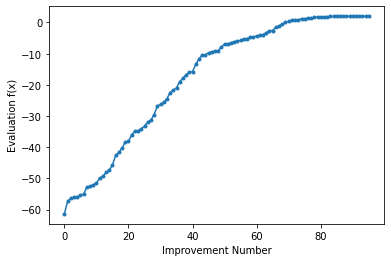

In [ ]:
# perform the hill climbing search
best, score, scores = hillclimbing(objective, bounds, n_iterations, step_size, flag='max')
print('Done!')
print('f(%s) = %f' % (best, score))
# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

>1 f([0.03742952 3.94183262]) = 1.81531
>2 f([0.05071661 3.77801391]) = 1.62378
>6 f([0.13629904 3.7176637 ]) = 1.34633
>8 f([0.20350909 3.80682283]) = 1.28579
>9 f([0.30008182 3.72882388]) = 1.02441
>11 f([0.35924751 3.682688  ]) = 0.88366
>12 f([0.45804323 3.65835798]) = 0.78135
>15 f([0.46376183 3.55881308]) = 0.60186
>16 f([0.58425083 3.56683642]) = 0.58546
>19 f([0.56838667 3.4951912 ]) = 0.44767
>21 f([0.59198964 3.34178138]) = 0.30083
>23 f([0.61311647 3.32155382]) = 0.27015
>27 f([0.71547491 3.21071737]) = 0.14715
>29 f([0.72925664 3.19294727]) = 0.13474
>30 f([0.90361672 3.09267515]) = 0.01793
>40 f([0.93399203 3.04566502]) = 0.00810
>43 f([1.00159835 3.02645494]) = 0.00385
>48 f([0.98033748 3.03427796]) = 0.00242
>60 f([1.00320299 2.97649422]) = 0.00221
>91 f([1.03119989 2.98121757]) = 0.00194
>136 f([0.99780828 2.99851485]) = 0.00006
>1933 f([1.00153732 3.00015069]) = 0.00001
Done!
f([1.00153732 3.00015069]) = 0.000014


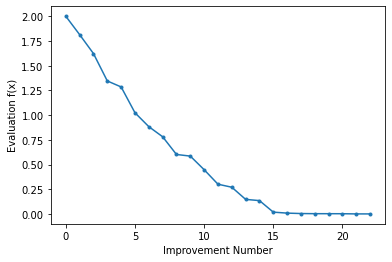

In [ ]:
# perform the hill climbing search
best, score, scores = hillclimbing(objective_2, bounds, n_iterations, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))
# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()